In [12]:
import pandas as pd
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [8]:
file_path = 'data_sets/output.json'


df = pd.DataFrame()

# 打开并逐行读取 JSON 文件
with open(file_path, 'r', encoding='utf-8') as file:
    data_list = []
    for line in file:
        try:
            # 解析每一行 JSON 数据
            data = json.loads(line)
            # 将解析的数据添加到列表中
            data_list.append(data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

# 将列表转换为 DataFrame
df = pd.concat([pd.DataFrame([item]) for item in data_list], ignore_index=True)

# 输出 DataFrame
print(df)

                       id                created_at lang  sentiment  \
0      112456490959251500  2024-05-17T12:44:32.000Z   en  -0.088889   
1      112456490959102444  2024-05-17T12:44:33.000Z   en   0.600000   
2      112456490941756071  2024-05-17T12:44:33.000Z   ja   0.000000   
3      112456490880422610  2024-05-17T12:32:08.000Z   de   0.000000   
4      112456490863011162  2024-05-17T12:44:27.000Z   en  -0.250000   
...                   ...                       ...  ...        ...   
21537  112456038115451487  2024-05-17T10:49:22.000Z   en  -0.250000   
21538  112456038101888520  2024-05-17T10:49:16.000Z   en   0.000000   
21539  112456038066490915  2024-05-17T10:49:23.000Z   es   0.000000   
21540  112456038063772326  2024-05-17T10:49:22.000Z   en   0.305556   
21541  112456038051273571  2024-05-17T10:49:16.000Z   en  -0.062500   

                                                  tokens  \
0      [its, out, join, wont, stuck, comply, starting...   
1      [like, staff, kind, 

In [11]:
df.iloc[0]

id                                           112456490959251500
created_at                             2024-05-17T12:44:32.000Z
lang                                                         en
sentiment                                             -0.088889
tokens        [its, out, join, wont, stuck, comply, starting...
tags                                                         []
Name: 0, dtype: object

## Prelinary learning 

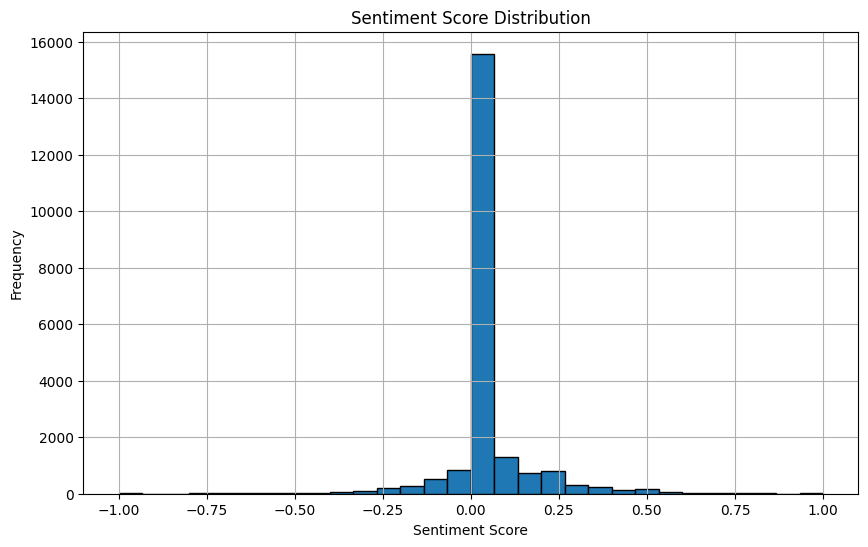

In [16]:
plt.figure(figsize=(10, 6))
df['sentiment'].hist(bins=30, edgecolor='black')

# 设置图表标题和标签
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# 显示图表
plt.show()

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 将 tokens 列转换为字符串
df['text'] = df['tokens'].apply(lambda x: ' '.join(x))

# 使用 CountVectorizer 创建词袋模型，并去掉停用词
vectorizer = CountVectorizer(stop_words='english')  # 或者使用自定义停用词列表：stop_words=my_stop_words_list
X = vectorizer.fit_transform(df['text'])

# 使用 LDA 进行主题建模
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

# 打印主题中的词语
for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])

Topic #1:
['die', 'der', 'und', 'das', 'ist', 'mit', 'den', 'auf', 'von', 'ein']
Topic #2:
['new', 'just', 'like', 'que', 'posted', 'com', 'time', 'today', 'day', 'people']


In [23]:
print(df.describe())

          sentiment  sentiment_normalized  sentiment_shifted  sentiment_log
count  21542.000000          21542.000000       21542.000000   21542.000000
mean       0.029052              0.514526           2.029052       0.705597
std        0.128346              0.064173           0.128346       0.062959
min       -1.000000              0.000000           1.000000       0.000000
25%        0.000000              0.500000           2.000000       0.693147
50%        0.000000              0.500000           2.000000       0.693147
75%        0.000000              0.500000           2.000000       0.693147
max        1.000000              1.000000           3.000000       1.098612


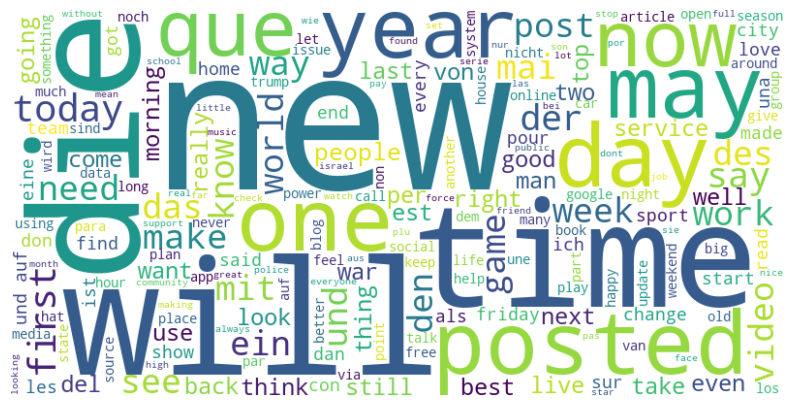

In [21]:


# 将 tokens 列中的词语拼接成一个字符串
text = ' '.join([' '.join(tokens) for tokens in df['tokens']])

# 生成词云
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# 绘制词云
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Extract relevant rows

In [28]:

# 定义与空气质量和天气相关的关键词
keywords = [
    'pm2.5', 'pm10', 'air', 'pollution', 'quality', 'smog', 'haze', 'weather',
    'temperature', 'humidity', 'rain', 'snow', 'wind', 'storm', 'forecast', 'sunny',
    'cloudy', 'visibility', 'particulate', 'ozone', 'dust', 'allergen', 'thunderstorm',
    'precipitation', 'climate', 'fog', 'barometer', 'dew', 'UV', 'index', 'aerosol',
    'heatwave', 'cold front', 'high pressure', 'low pressure'
]

# 提取相关信息
def extract_relevant_tokens(tokens, keywords):
    return [token for token in tokens if token.lower() in keywords]

df['relevant_tokens'] = df['tokens'].apply(lambda x: extract_relevant_tokens(x, keywords))

# 过滤包含相关关键词的行
relevant_rows = df[df['relevant_tokens'].apply(lambda x: len(x) > 0)]

# 将包含相关关键词的行变成新的 DataFrame
relevant_df = relevant_rows.reset_index(drop=True)

relevant_df

,id,created_at,lang,sentiment,tokens,tags,sentiment_normalized,sentiment_shifted,sentiment_log,text,relevant_tokens
0,112456489692541779,2024-05-17T12:44:14.000Z,en,0.000000,"[finance, crossroads, climate, azerbaijan, foc...",[],0.500000,2.000000,0.693147,finance crossroads climate azerbaijan focus th...,[climate]
1,112456488438899407,2024-05-17T12:43:53.000Z,en,0.000000,"[county, edt, impact, through, western, thunde...",[],0.500000,2.000000,0.693147,county edt impact through western thunderstorm...,[wind]
2,112456487504546755,2024-05-17T12:43:26.000Z,en,0.000000,"[yes, three, fryer, please, broccoli, bites, i...",[],0.500000,2.000000,0.693147,yes three fryer please broccoli bites into tas...,[air]
3,112456487179818698,2024-05-17T12:43:35.000Z,en,0.000000,"[cool, current, isn, forecast, that, the, fog,...",[],0.500000,2.000000,0.693147,cool current isn forecast that the fog woah,"[forecast, fog]"
4,112456486474670635,2024-05-17T12:42:21.000Z,en,-0.041667,"[weather, please, regional, note, athens, that...",[godawgs],0.479167,1.958333,0.672094,weather please regional note athens that have ...,[weather]
...,...,...,...,...,...,...,...,...,...,...,...
554,112456040323802306,2024-05-17T10:49:52.000Z,de,0.000000,"[blick, sonn, ziemlich, platz, gedampft, hat, ...",[circumetneacised],0.500000,2.000000,0.693147,blick sonn ziemlich platz gedampft hat sicher ...,[smog]
555,112456039006597759,2024-05-17T10:49:38.009Z,en,0.040000,"[like, and, low, worcester, current, speed, fe...",[],0.520000,2.040000,0.712950,like and low worcester current speed feels the...,"[humidity, temperature, wind, visibility]"
556,112456039005573395,2024-05-17T10:49:37.992Z,en,0.040000,"[like, and, low, current, speed, hudson, feels...",[],0.520000,2.040000,0.712950,like and low current speed hudson feels the hu...,"[humidity, temperature, wind, visibility]"
557,112456038570647856,2024-05-17T10:49:30.739Z,en,0.250000,"[afiliado, breaker, link, por, nii, este, amaz...",[],0.625000,2.250000,0.810930,afiliado breaker link por nii este amazon pani...,[wind]


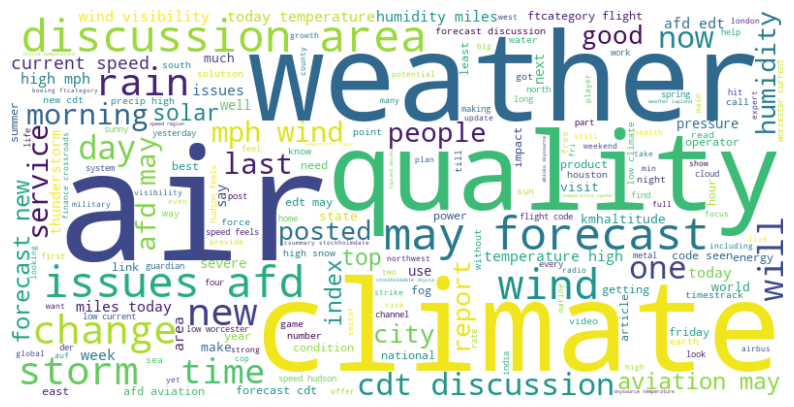

In [29]:

# 将 tokens 列中的词语拼接成一个字符串
text = ' '.join([' '.join(tokens) for tokens in relevant_df['tokens']])

# 生成词云
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# 绘制词云
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
relevant_df.describe()

,sentiment,sentiment_normalized,sentiment_shifted,sentiment_log
count,559.000000,559.000000,559.000000,559.000000
mean,0.045996,0.522998,2.045996,0.713903
std,0.130401,0.065200,0.130401,0.062838
min,-0.750000,0.125000,1.250000,0.223144
25%,0.000000,0.500000,2.000000,0.693147
50%,0.000000,0.500000,2.000000,0.693147
75%,0.068759,0.534380,2.068759,0.726949
max,0.800000,0.900000,2.800000,1.029619


In [32]:
relevant_df

,id,created_at,lang,sentiment,tokens,tags,sentiment_normalized,sentiment_shifted,sentiment_log,text,relevant_tokens
0,112456489692541779,2024-05-17T12:44:14.000Z,en,0.000000,"[finance, crossroads, climate, azerbaijan, foc...",[],0.500000,2.000000,0.693147,finance crossroads climate azerbaijan focus th...,[climate]
1,112456488438899407,2024-05-17T12:43:53.000Z,en,0.000000,"[county, edt, impact, through, western, thunde...",[],0.500000,2.000000,0.693147,county edt impact through western thunderstorm...,[wind]
2,112456487504546755,2024-05-17T12:43:26.000Z,en,0.000000,"[yes, three, fryer, please, broccoli, bites, i...",[],0.500000,2.000000,0.693147,yes three fryer please broccoli bites into tas...,[air]
3,112456487179818698,2024-05-17T12:43:35.000Z,en,0.000000,"[cool, current, isn, forecast, that, the, fog,...",[],0.500000,2.000000,0.693147,cool current isn forecast that the fog woah,"[forecast, fog]"
4,112456486474670635,2024-05-17T12:42:21.000Z,en,-0.041667,"[weather, please, regional, note, athens, that...",[godawgs],0.479167,1.958333,0.672094,weather please regional note athens that have ...,[weather]
...,...,...,...,...,...,...,...,...,...,...,...
554,112456040323802306,2024-05-17T10:49:52.000Z,de,0.000000,"[blick, sonn, ziemlich, platz, gedampft, hat, ...",[circumetneacised],0.500000,2.000000,0.693147,blick sonn ziemlich platz gedampft hat sicher ...,[smog]
555,112456039006597759,2024-05-17T10:49:38.009Z,en,0.040000,"[like, and, low, worcester, current, speed, fe...",[],0.520000,2.040000,0.712950,like and low worcester current speed feels the...,"[humidity, temperature, wind, visibility]"
556,112456039005573395,2024-05-17T10:49:37.992Z,en,0.040000,"[like, and, low, current, speed, hudson, feels...",[],0.520000,2.040000,0.712950,like and low current speed hudson feels the hu...,"[humidity, temperature, wind, visibility]"
557,112456038570647856,2024-05-17T10:49:30.739Z,en,0.250000,"[afiliado, breaker, link, por, nii, este, amaz...",[],0.625000,2.250000,0.810930,afiliado breaker link por nii este amazon pani...,[wind]


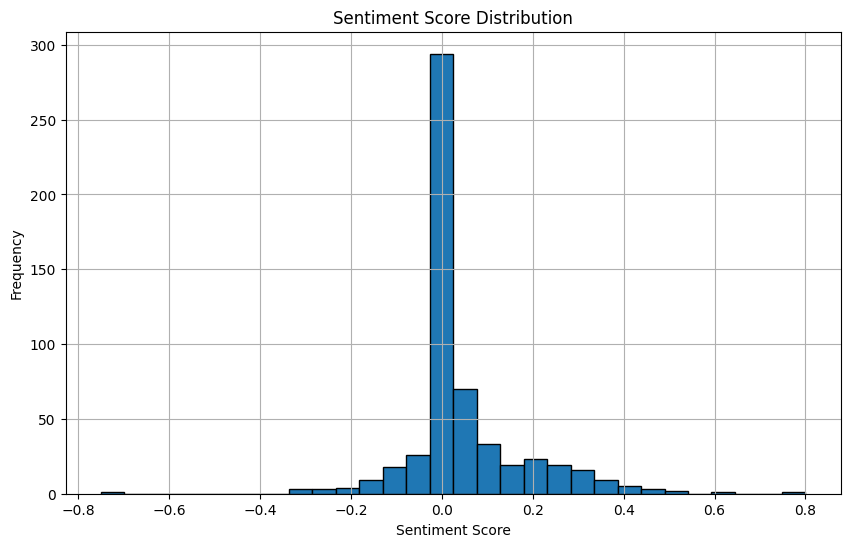

In [31]:
plt.figure(figsize=(10, 6))
relevant_df['sentiment'].hist(bins=30, edgecolor='black')

# 设置图表标题和标签
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# 显示图表
plt.show()